## Linear Regression Using Deep Neural Network

### Boston House Price Prediction 

#### COMPBEB1326

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping



In [2]:
#load the data
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
col_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV' ]
house_df =  pd.read_csv(url, sep= '\s+', names=col_names )
house_df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
'''====== Data Exploration and Preprocessing ======'''

#shape of dataframe
house_df.shape

(506, 14)

In [4]:
#check there are any NAN values
house_df.isnull().values.any()

False

In [5]:
'''=== show the statistics analysis of each attributes ==='''

#descriptive statistics 
house_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


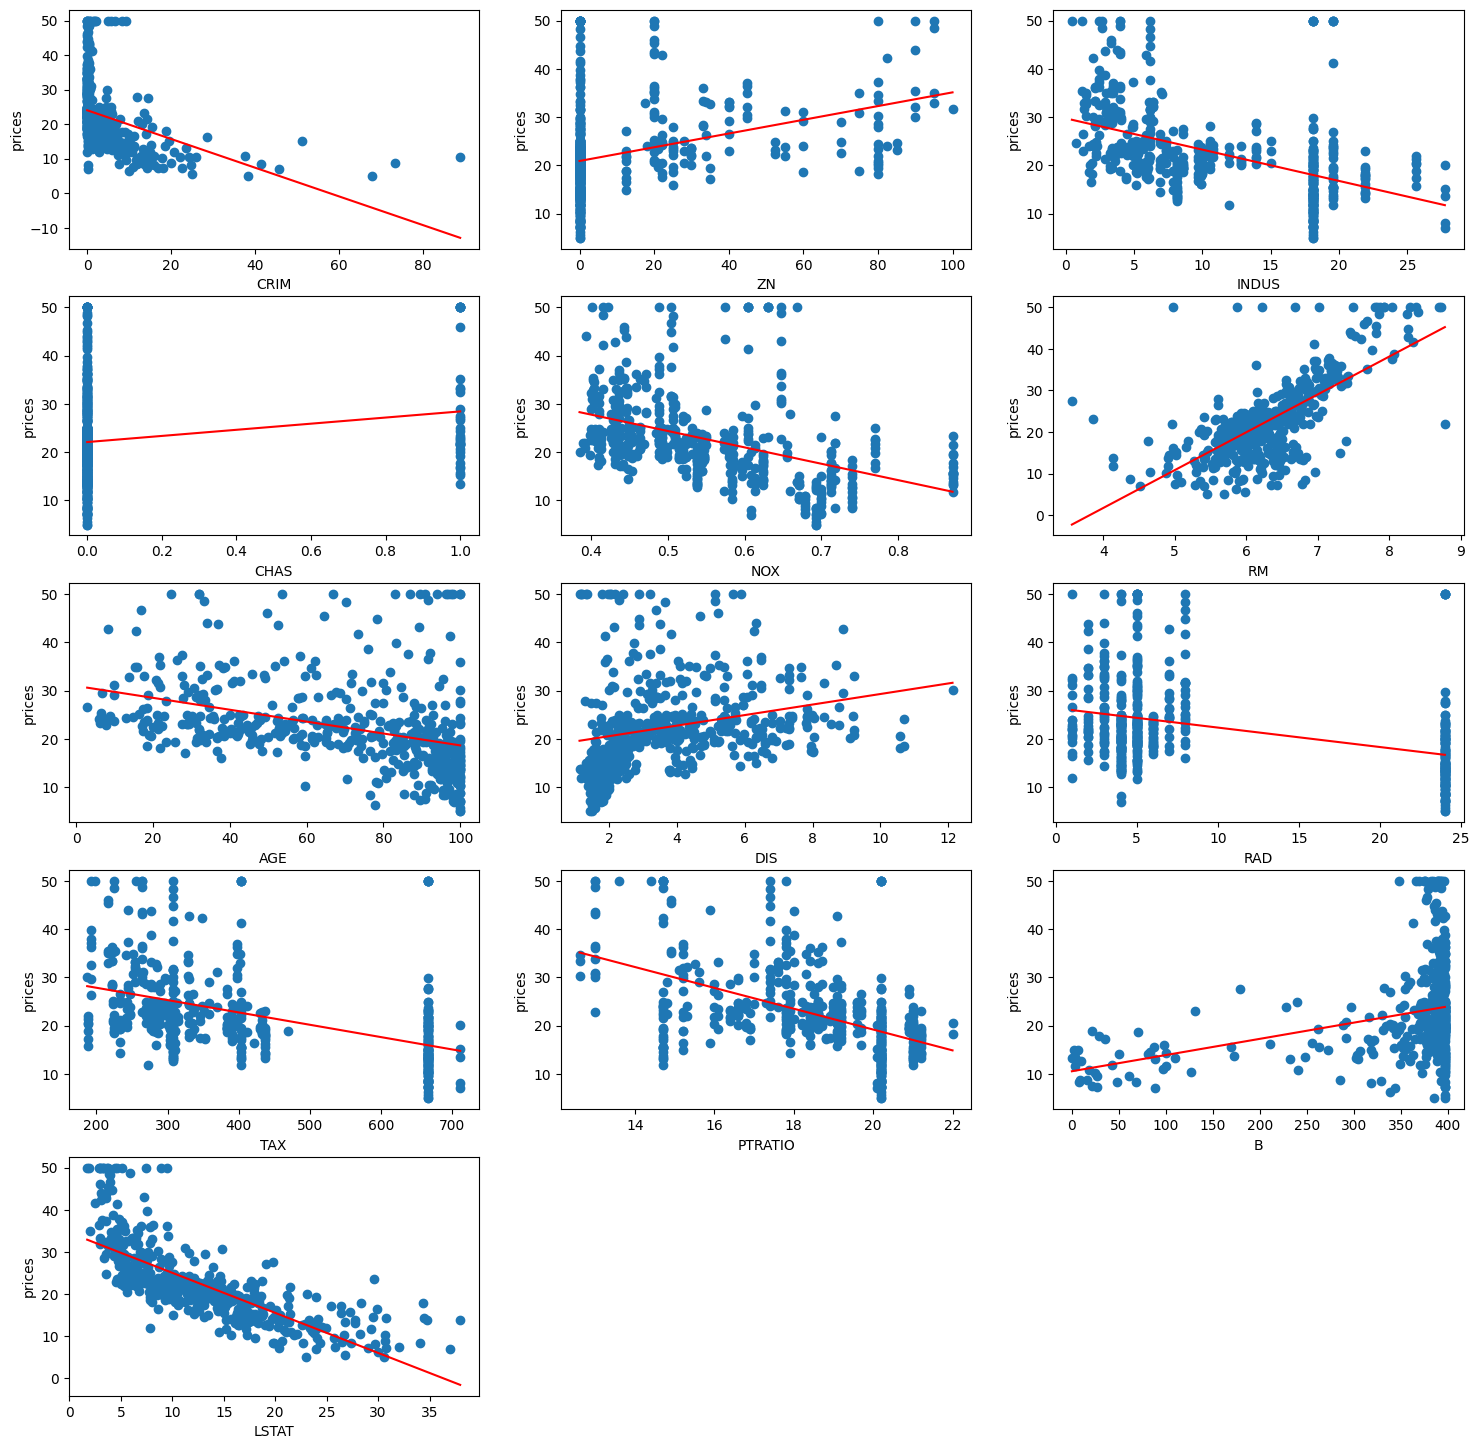

In [6]:
'''=== Show the linear relationship between features  and price (MEDV). Thus, it provides that how the scattered 
      they are and which features has more impact in prediction of house price. ==='''

# visiualize all variables  with price(MEDV)
from scipy import stats
#creates figure
plt.figure(figsize=(18, 18))

for i, col in enumerate(house_df.columns[0:13]): #iterates over all columns except for price column (last one)
    plt.subplot(5, 3, i+1) # each row three figure
    x = house_df[col] #x-axis
    y = house_df['MEDV'] #y-axis
    plt.plot(x, y, 'o')
    
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1)) (np.unique(x)), color='red')
    plt.xlabel(col) # x-label
    plt.ylabel('prices') # y-label
    
   
    
    

In [7]:
# separate the training and target variable
feature = house_df.iloc[:,0:13] #  training variables
target = house_df.iloc[:,13] # target varible
print(feature.head())
print('\n',target.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX   
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0  \
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  

 0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64


In [8]:
'''=== Noramlization the features. Since it is seen that features have different ranges, it is best practice to
normalize/standarize the feature before using them in the model ==='''

#feature normalization
normalized_feature =  keras.utils.normalize(feature.values)
print(normalized_feature)

[[1.26388341e-05 3.59966795e-02 4.61957387e-03 ... 3.05971776e-02
  7.93726783e-01 9.95908132e-03]
 [5.78529889e-05 0.00000000e+00 1.49769546e-02 ... 3.77071843e-02
  8.40785474e-01 1.93620036e-02]
 [5.85729947e-05 0.00000000e+00 1.51744622e-02 ... 3.82044450e-02
  8.43137761e-01 8.64965806e-03]
 ...
 [1.23765824e-04 0.00000000e+00 2.43009593e-02 ... 4.27762066e-02
  8.08470305e-01 1.14884669e-02]
 [2.24644719e-04 0.00000000e+00 2.44548909e-02 ... 4.30471676e-02
  8.06519433e-01 1.32831260e-02]
 [9.69214289e-05 0.00000000e+00 2.43887924e-02 ... 4.29308164e-02
  8.11392431e-01 1.61092778e-02]]


In [9]:
'''==== Multi-Layer Perception architecture is used for prediction of house price ===='''

# shuffle and split data into train (~80%) and test (~20%)
X_train, X_test, y_train, y_test = train_test_split(normalized_feature, target.values, 
                                                    test_size=0.2, random_state=42) 
print('training data shape: ',X_train.shape)
print('testing data shape: ',X_test.shape)


training data shape:  (404, 13)
testing data shape:  (102, 13)


In [10]:
'''===== Build MLP Network ====='''

#get number of columns in training data
n_cols = X_train.shape[1]

# builds model
model = keras.Sequential()

model.add(keras.layers.Dense(150, activation=tf.nn.relu, 
                       input_shape=(n_cols,)))
model.add(keras.layers.Dense(150, activation=tf.nn.relu))
model.add(keras.layers.Dense(150, activation=tf.nn.relu))
model.add(keras.layers.Dense(150, activation=tf.nn.relu))
model.add(keras.layers.Dense(150, activation=tf.nn.relu))
model.add(keras.layers.Dense(1))

#compile model
model.compile(loss='mse', optimizer='adam', metrics=['mae']) # use metric as mean absolute error

#inspect the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 150)               2100      
                                                                 
 dense_1 (Dense)             (None, 150)               22650     
                                                                 
 dense_2 (Dense)             (None, 150)               22650     
                                                                 
 dense_3 (Dense)             (None, 150)               22650     
                                                                 
 dense_4 (Dense)             (None, 150)               22650     
                                                                 
 dense_5 (Dense)             (None, 1)                 151       
                                                                 
Total params: 92,851
Trainable params: 92,851
Non-traina

In [11]:
#train model and perform validation test

early_stop = EarlyStopping(monitor='val_loss', patience=15) # stops training when it doesn't show improvemnet.

history = model.fit(X_train, y_train, epochs=300, 
          validation_split=0.2, verbose=1, callbacks=[early_stop])


Epoch 1/300
11/11 [==============================] - 8s 66ms/step - loss: 596.2460 - mae: 22.4850 - val_loss: 475.0747 - val_mae: 20.1436
Epoch 2/300
11/11 [==============================] - 0s 15ms/step - loss: 383.1664 - mae: 16.8693 - val_loss: 81.3598 - val_mae: 6.1248
Epoch 3/300
11/11 [==============================] - 0s 15ms/step - loss: 129.6291 - mae: 9.4948 - val_loss: 64.9528 - val_mae: 5.4588
Epoch 4/300
11/11 [==============================] - 0s 15ms/step - loss: 114.8673 - mae: 7.5628 - val_loss: 68.1012 - val_mae: 5.2747
Epoch 5/300
11/11 [==============================] - 0s 14ms/step - loss: 84.8650 - mae: 7.0110 - val_loss: 67.6713 - val_mae: 6.6636
Epoch 6/300
11/11 [==============================] - 0s 15ms/step - loss: 74.8717 - mae: 6.4740 - val_loss: 59.6503 - val_mae: 4.9443
Epoch 7/300
11/11 [==============================] - 0s 15ms/step - loss: 71.9633 - mae: 6.0691 - val_loss: 61.9950 - val_mae: 6.0674
Epoch 8/300
11/11 [==============================] - 0

Epoch 62/300
11/11 [==============================] - 0s 13ms/step - loss: 43.2842 - mae: 4.4989 - val_loss: 39.8149 - val_mae: 4.2832
Epoch 63/300
11/11 [==============================] - 0s 17ms/step - loss: 40.1420 - mae: 4.3005 - val_loss: 54.1220 - val_mae: 5.7573
Epoch 64/300
11/11 [==============================] - 0s 15ms/step - loss: 49.0478 - mae: 5.3225 - val_loss: 37.9857 - val_mae: 3.8449
Epoch 65/300
11/11 [==============================] - 0s 15ms/step - loss: 40.8275 - mae: 4.5997 - val_loss: 37.7775 - val_mae: 3.9514
Epoch 66/300
11/11 [==============================] - 0s 12ms/step - loss: 35.8900 - mae: 4.2423 - val_loss: 38.0300 - val_mae: 4.2367
Epoch 67/300
11/11 [==============================] - 0s 13ms/step - loss: 35.0134 - mae: 4.2242 - val_loss: 37.6033 - val_mae: 3.7963
Epoch 68/300
11/11 [==============================] - 0s 13ms/step - loss: 35.5101 - mae: 4.3606 - val_loss: 36.5307 - val_mae: 3.7183
Epoch 69/300
11/11 [==============================] - 0

11/11 [==============================] - 0s 11ms/step - loss: 15.5004 - mae: 2.9741 - val_loss: 49.4307 - val_mae: 5.5622
Epoch 123/300
11/11 [==============================] - 0s 13ms/step - loss: 27.1513 - mae: 3.9343 - val_loss: 24.1066 - val_mae: 3.2123
Epoch 124/300
11/11 [==============================] - 0s 12ms/step - loss: 17.6779 - mae: 3.1945 - val_loss: 21.6445 - val_mae: 3.0365
Epoch 125/300
11/11 [==============================] - 0s 14ms/step - loss: 26.2147 - mae: 3.8239 - val_loss: 21.1084 - val_mae: 3.1076
Epoch 126/300
11/11 [==============================] - 0s 14ms/step - loss: 17.5817 - mae: 3.1431 - val_loss: 18.9853 - val_mae: 2.9443
Epoch 127/300
11/11 [==============================] - 0s 14ms/step - loss: 16.5905 - mae: 3.0597 - val_loss: 19.7114 - val_mae: 3.0092
Epoch 128/300
11/11 [==============================] - 0s 13ms/step - loss: 17.2357 - mae: 3.0289 - val_loss: 21.0406 - val_mae: 3.0719
Epoch 129/300
11/11 [==============================] - 0s 12ms

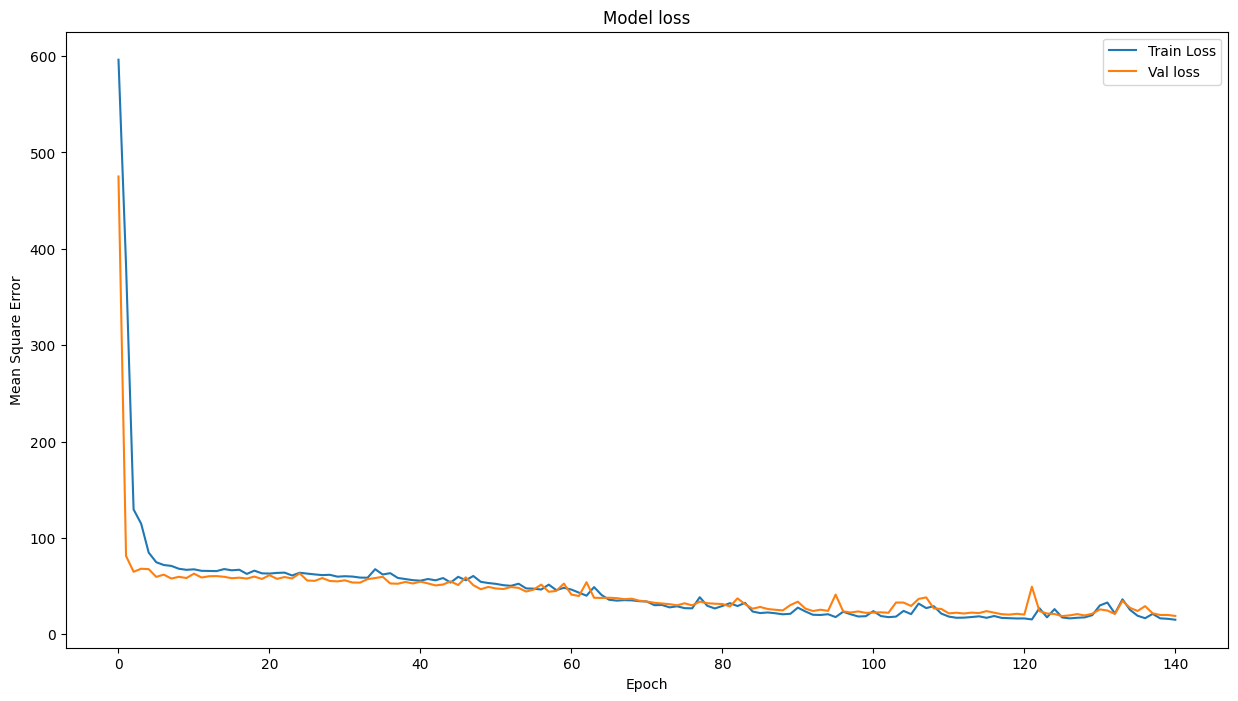

In [12]:
# show the graph of model loss in trainig and validation 

plt.figure(figsize=(15,8))
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error')
plt.plot(history.epoch, history.history['loss'],
           label='Train Loss')
plt.plot(history.epoch, history.history['val_loss'],
           label = 'Val loss')
plt.title('Model loss')
plt.legend()


In [13]:
#check the model performace in test dataset
score = model.evaluate(X_test, y_test, verbose=1)
print('loss value: ', score[0])
print('Mean absolute error: ', score[1])



4/4 [==============================] - 0s 7ms/step - loss: 16.0007 - mae: 2.6283
loss value:  16.00065040588379
Mean absolute error:  2.62831974029541


In [14]:
'''=== predict the house price ==='''

# predict house price using the test data 
test_predictions = model.predict(X_test).flatten()
print(test_predictions)


4/4 [==============================] - 0s 5ms/step
[25.26857   36.857635  17.182556  24.416069  17.062113  18.74786
 17.691906  14.178072  21.235064  18.802992  19.36607   18.059885
  8.725393  18.442987  20.229528  22.086145  19.815123  10.731499
 42.211594  15.822421  27.085905  25.95963   15.8133955 21.813425
 18.615889  15.919199  20.97253   12.042212  19.10489   18.611156
 20.124426  24.033068  17.998125  25.054937  14.908825  14.011653
 31.852509  22.820824  19.248928  21.944572  15.637126  31.73019
 46.398808  18.830133  23.839388  16.894602  16.534327  22.934317
 17.658276  33.435623  19.953741  35.85704   17.548973  25.399937
 44.025734  22.514015  17.858011  35.428402  22.76335   16.746855
 21.591648  33.654976  34.954353  15.551216  24.096159  17.32155
 16.885336  24.483698  32.138287  12.0759735 20.440556  27.853188
 13.220786  22.53595   19.946733  10.60152   19.959566  43.7124
 13.206362  13.900189  21.476852  12.077624  21.816774  11.848736
 21.051695  26.443783  18.9842

In [15]:
# show the true value and predicted value in dataframe
true_predicted = pd.DataFrame(list(zip(y_test, test_predictions)), 
                    columns=['True Value','Predicted Value'])
true_predicted.head(10)

,True Value,Predicted Value
0,23.6,25.268570
1,32.4,36.857635
2,13.6,17.182556
3,22.8,24.416069
4,16.1,17.062113
5,20.0,18.747860
6,17.8,17.691906
7,14.0,14.178072
8,19.6,21.235064
9,16.8,18.802992


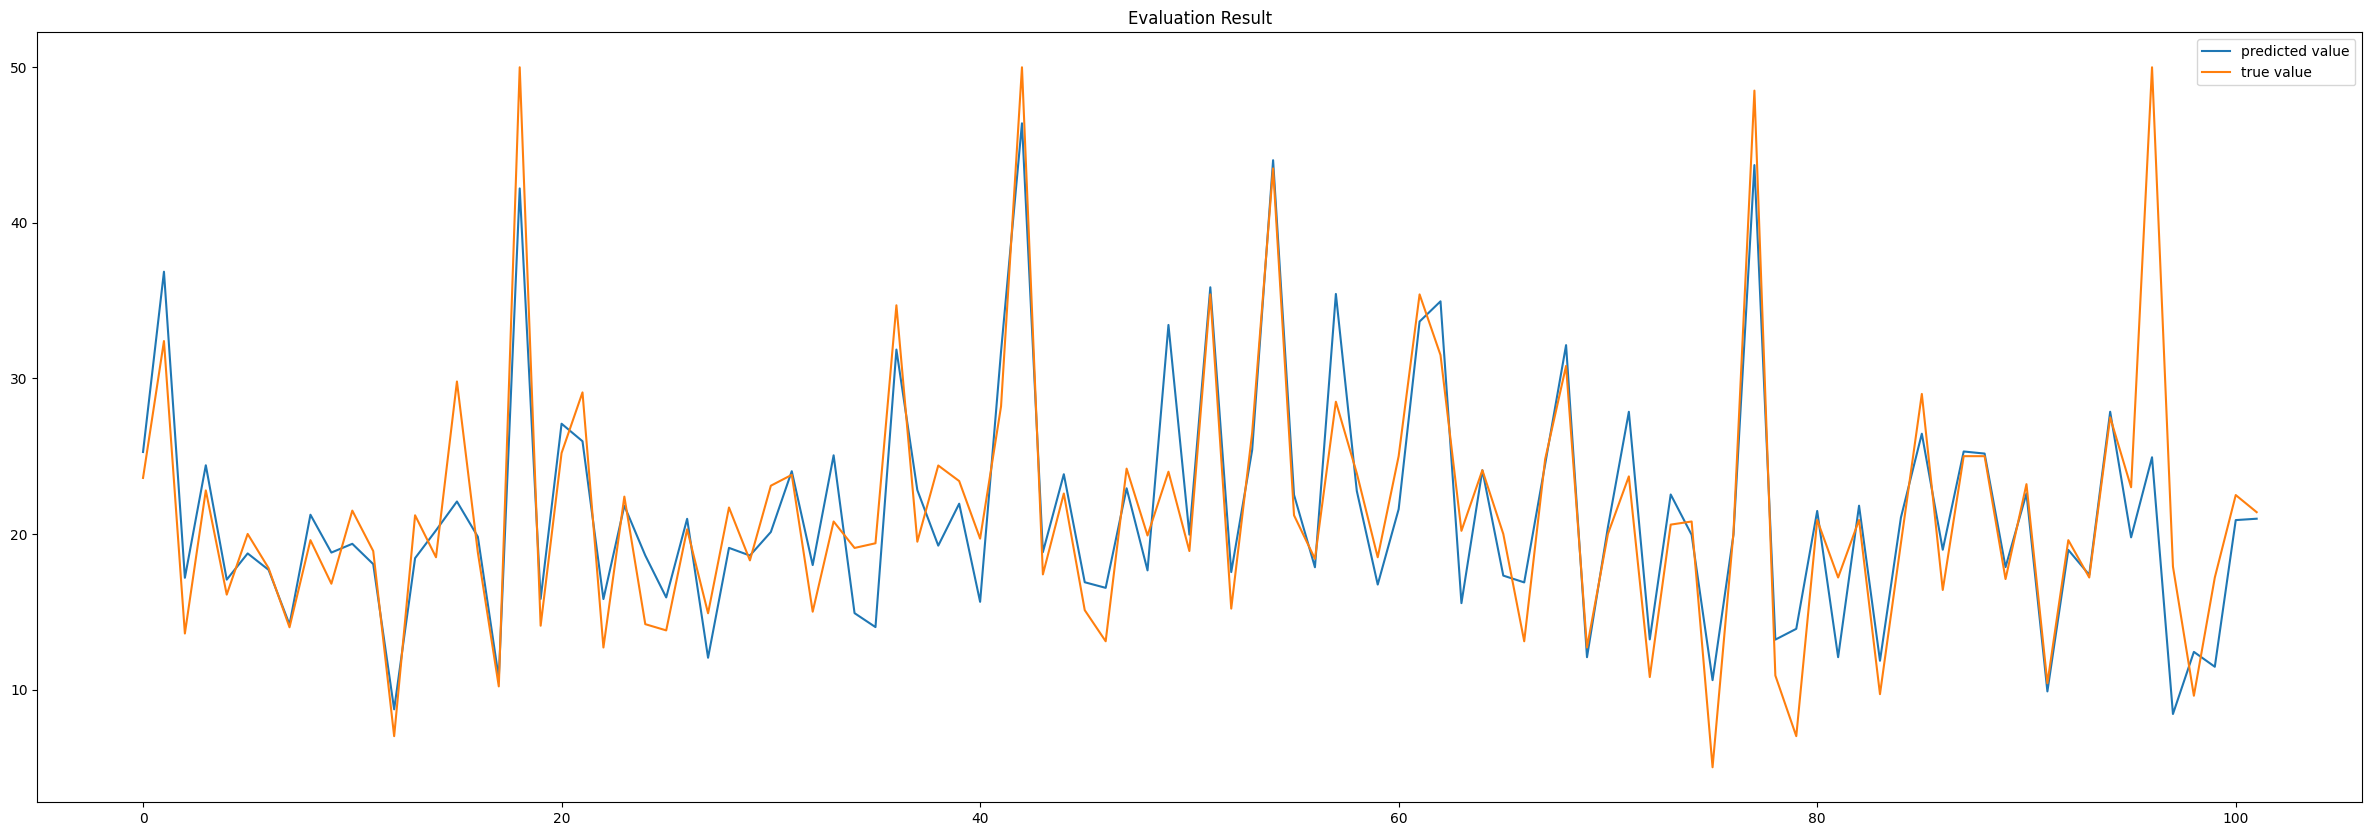

In [16]:
#visiulize the true value with predicted value (using line graph)
x = test_predictions
y = y_test
plt.figure(figsize=(30,10))
plt.plot(x, label='predicted value')
plt.plot(y, label='true value')
plt.title('Evaluation Result')
plt.legend()
plt.show()

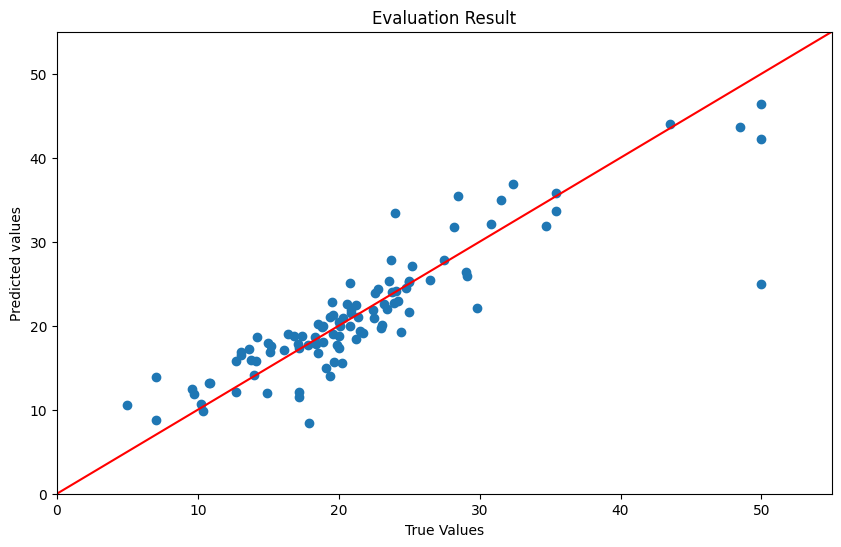

In [17]:
'''=== Visualize the model evaluation skill ==='''


# visualize the prediction uisng diagonal line
y = test_predictions #y-axis
x = y_test #x-axis
fig, ax = plt.subplots(figsize=(10,6)) # create figure
ax.scatter(x,y) #scatter plots for x,y
ax.set(xlim=(0,55), ylim=(0, 55)) #set limit
ax.plot(ax.get_xlim(), ax.get_ylim(), color ='red') # draw 45 degree diagonal in figure
plt.xlabel('True Values')
plt.ylabel('Predicted values')
plt.title('Evaluation Result')
plt.show()

         ======= Remove outliers from the data set ========
  Tried to see the model perfomance after removing the outliers, the perfomance doesn't 
  show much improvemnt. This might be less data size after remoing the outliers.


In [18]:
#calcualtes quartiles and interquaterlies
Q1 = house_df.quantile(0.25)
Q3 = house_df.quantile(0.75)
IQR = Q3 - Q1

In [19]:
house_data = house_df.iloc[:,0:14]
house_data.shape


(506, 14)

In [20]:
#data after outliers remvoing
clean_data = house_df[~((house_data < (Q1 - 1.5 * IQR)) |(house_data > (Q3 + 1.5 * IQR))).any(axis=1)]
clean_data.shape

(268, 14)

In [21]:
feature = clean_data.iloc[:,0:13] #  training variables
target = clean_data.iloc[:,13] # target varible
print(feature.head())
print('\n',target.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX   
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0  \
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  

 0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64


In [22]:
#feature normalization
normalized_feature =  keras.utils.normalize(feature.values)
print(normalized_feature)

[[1.26388341e-05 3.59966795e-02 4.61957387e-03 ... 3.05971776e-02
  7.93726783e-01 9.95908132e-03]
 [5.78529889e-05 0.00000000e+00 1.49769546e-02 ... 3.77071843e-02
  8.40785474e-01 1.93620036e-02]
 [5.85729947e-05 0.00000000e+00 1.51744622e-02 ... 3.82044450e-02
  8.43137761e-01 8.64965806e-03]
 ...
 [1.23765824e-04 0.00000000e+00 2.43009593e-02 ... 4.27762066e-02
  8.08470305e-01 1.14884669e-02]
 [2.24644719e-04 0.00000000e+00 2.44548909e-02 ... 4.30471676e-02
  8.06519433e-01 1.32831260e-02]
 [9.69214289e-05 0.00000000e+00 2.43887924e-02 ... 4.29308164e-02
  8.11392431e-01 1.61092778e-02]]


In [23]:
# shuffle and split data into train (~80%) and test (~20%)
X_train, X_test, y_train, y_test = train_test_split(normalized_feature, target.values, test_size=0.2, random_state=42) 
print('training data shape: ',X_train.shape)
print('testing data shape: ',X_test.shape)


training data shape:  (214, 13)
testing data shape:  (54, 13)


In [24]:
#get number of columns in training data
n_cols = X_train.shape[1]

# builds model
model = keras.Sequential()

model.add(keras.layers.Dense(150, activation=tf.nn.relu, 
                       input_shape=(n_cols,)))
model.add(keras.layers.Dense(150, activation=tf.nn.relu))
model.add(keras.layers.Dense(150, activation=tf.nn.relu))
model.add(keras.layers.Dense(150, activation=tf.nn.relu))
model.add(keras.layers.Dense(150, activation=tf.nn.relu))
model.add(keras.layers.Dense(1))

#compile model
model.compile(loss='mse', optimizer='adam', metrics=['mae']) # use metric as mean absolute error

#inspect the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 150)               2100      
                                                                 
 dense_7 (Dense)             (None, 150)               22650     
                                                                 
 dense_8 (Dense)             (None, 150)               22650     
                                                                 
 dense_9 (Dense)             (None, 150)               22650     
                                                                 
 dense_10 (Dense)            (None, 150)               22650     
                                                                 
 dense_11 (Dense)            (None, 1)                 151       
                                                                 
Total params: 92,851
Trainable params: 92,851
Non-trai

In [25]:

#train model
early_stop = EarlyStopping(monitor='val_loss', patience=20) # stops training when it doesn't show improvemnet.

history = model.fit(X_train, y_train, epochs=300, 
          validation_split=0.2, verbose=1, callbacks=[early_stop])


Epoch 1/300
6/6 [==============================] - 3s 90ms/step - loss: 484.0591 - mae: 21.4190 - val_loss: 429.8443 - val_mae: 20.3766
Epoch 2/300
6/6 [==============================] - 0s 20ms/step - loss: 447.0627 - mae: 20.5446 - val_loss: 361.2216 - val_mae: 18.6192
Epoch 3/300
6/6 [==============================] - 0s 21ms/step - loss: 341.9328 - mae: 17.7180 - val_loss: 185.1566 - val_mae: 13.0679
Epoch 4/300
6/6 [==============================] - 0s 20ms/step - loss: 119.6922 - mae: 9.2926 - val_loss: 21.2503 - val_mae: 3.8081
Epoch 5/300
6/6 [==============================] - 0s 19ms/step - loss: 65.7164 - mae: 7.1310 - val_loss: 42.2422 - val_mae: 5.7139
Epoch 6/300
6/6 [==============================] - 0s 19ms/step - loss: 31.9148 - mae: 4.3353 - val_loss: 23.7252 - val_mae: 3.7757
Epoch 7/300
6/6 [==============================] - 0s 20ms/step - loss: 38.3870 - mae: 4.8643 - val_loss: 20.7647 - val_mae: 3.4616
Epoch 8/300
6/6 [==============================] - 0s 21ms/step

In [26]:
#check the model performace in test dataset
score = model.evaluate(X_test, y_test, verbose=1)
print('loss value: ', score[0])
print('Mean absolute error: ', score[1])



2/2 [==============================] - 0s 11ms/step - loss: 16.1888 - mae: 2.8956
loss value:  16.188846588134766
Mean absolute error:  2.895632743835449


In [27]:

# predict house price using the test data 
test_predictions = model.predict(X_test).flatten()
print(test_predictions)


2/2 [==============================] - 0s 1ms/step
[18.373901 24.117474 20.803293 18.030167 18.44822  23.034983 16.621387
 22.657734 22.559332 23.919703 18.009483 22.138653 23.441317 21.68892
 20.754656 22.89337  22.893915 23.267296 20.700975 18.523424 19.529322
 21.199564 19.501696 22.80454  23.249876 23.624315 20.59682  25.025734
 23.46827  18.726194 25.105751 23.690884 21.987232 16.815454 21.357962
 20.225649 18.215948 20.952955 24.829683 17.991014 20.382105 18.744394
 20.992401 16.735601 21.663494 19.520311 21.968357 22.206364 20.432703
 23.089651 16.651203 16.732962 23.473946 17.013853]


In [28]:
# show the true value and predicted value in dataframe
true_predicted = pd.DataFrame(list(zip(y_test, test_predictions)), columns=['True Value','Predicted Value'])
true_predicted.head(10)

,True Value,Predicted Value
0,23.0,18.373901
1,18.7,24.117474
2,14.5,20.803293
3,19.1,18.030167
4,18.1,18.448219
5,23.3,23.034983
6,17.7,16.621387
7,23.2,22.657734
8,18.9,22.559332
9,28.0,23.919703


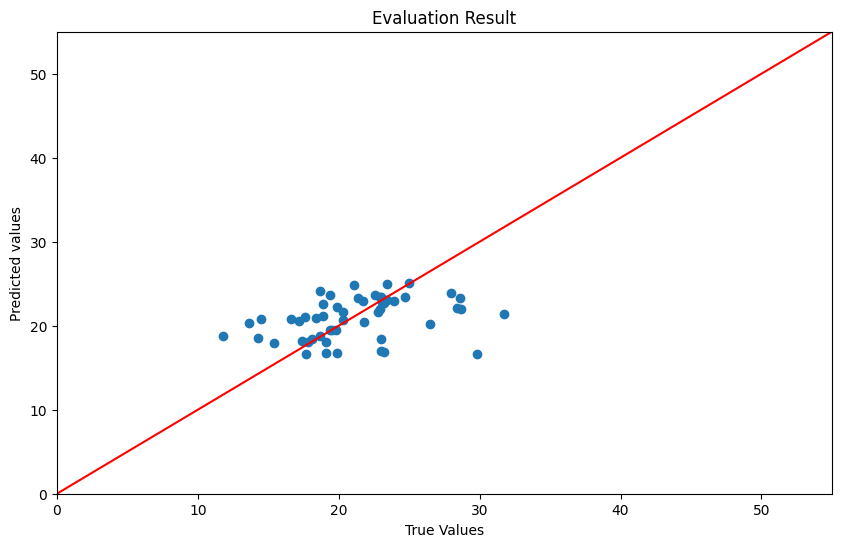

In [29]:
# visualize the prediction uisng diagonal line
y = test_predictions #y-axis
x = y_test #x-axis
fig, ax = plt.subplots(figsize=(10,6)) # create figure
ax.scatter(x,y) #scatter plots for x,y
ax.set(xlim=(0,55), ylim=(0, 55)) #set limit
ax.plot(ax.get_xlim(), ax.get_ylim(), color ='red') # draw 45 degree diagonal in figure
plt.xlabel('True Values')
plt.ylabel('Predicted values')
plt.title('Evaluation Result')
plt.show()